# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [3]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


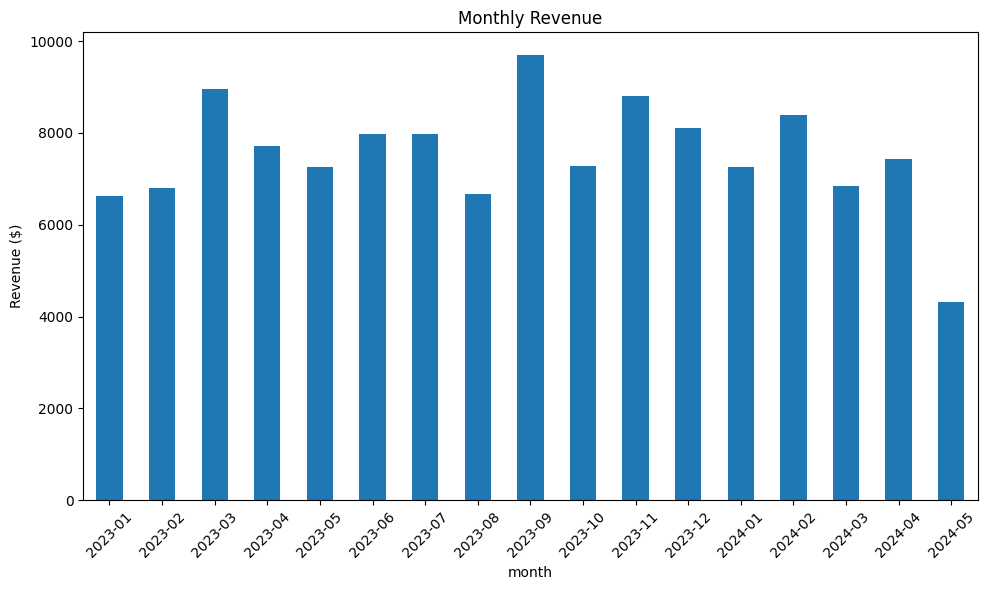

In [4]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total Revenue (Jan–Apr 2024): $29,923.52


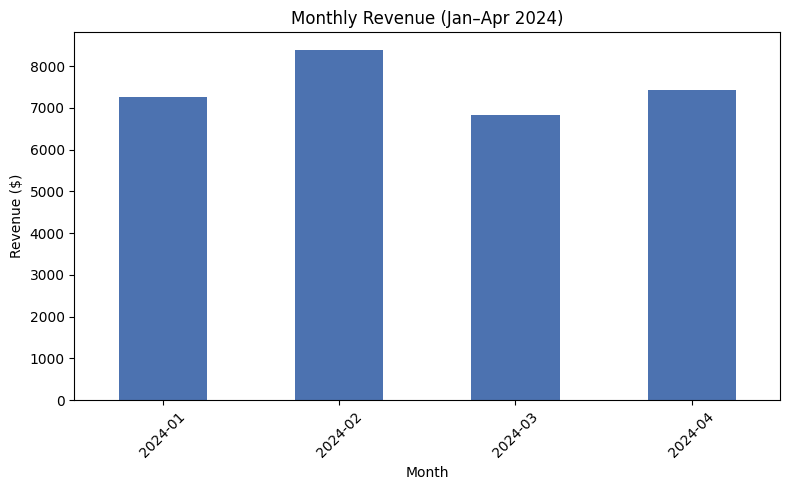

In [26]:
start_period = pd.Period("2024-01", freq="M")
end_period = pd.Period("2024-04", freq="M")

quarter_data = data[(data["month"] >= start_period) & (data["month"] <= end_period)]
total_quarterly_revenue = quarter_data["revenue"].sum()
print(f"Total Revenue (Jan–Apr 2024): ${total_quarterly_revenue:,.2f}")

monthly_revenue = quarter_data.groupby('month')['revenue'].sum()

plt.figure(figsize=(8,5))
monthly_revenue.plot(kind='bar', color='#4C72B0')
plt.title('Monthly Revenue (Jan–Apr 2024)')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Revenue:
Customer 62: $4,448.39
Customer 24: $3,369.44
Customer 90: $2,976.78
Customer 92: $2,838.74
Customer 97: $2,835.62


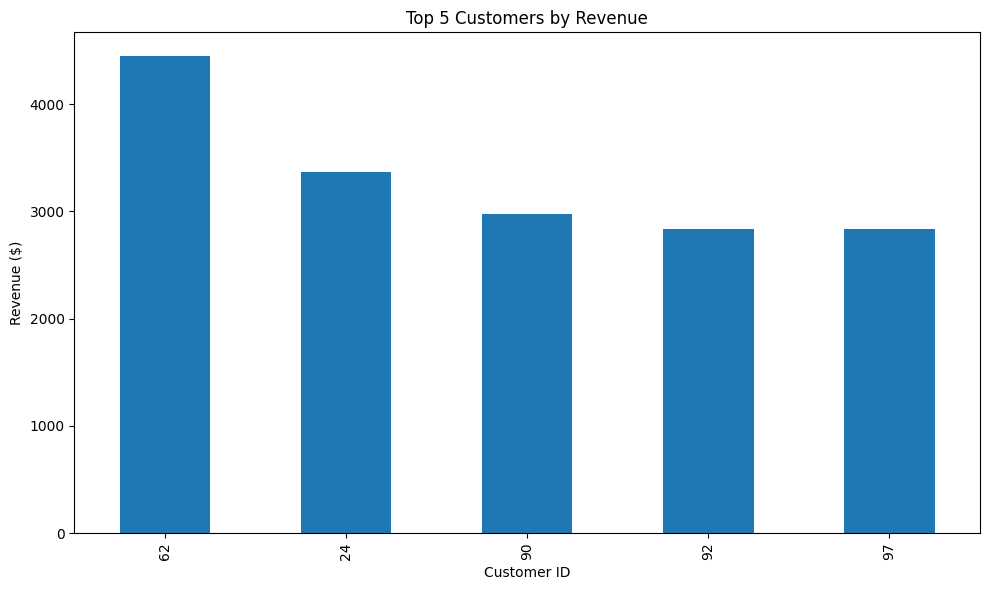

In [6]:
# Your code here
top_customers = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Revenue:")
for customer, revenue in top_customers.items():
    print(f"Customer {customer}: ${revenue:,.2f}")

# Visualization
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 5 Customers by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Customer ID')
plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Average Revenue per Order by Customer Segment:
Senior: $262.13
Professional: $255.65
Student: $253.81


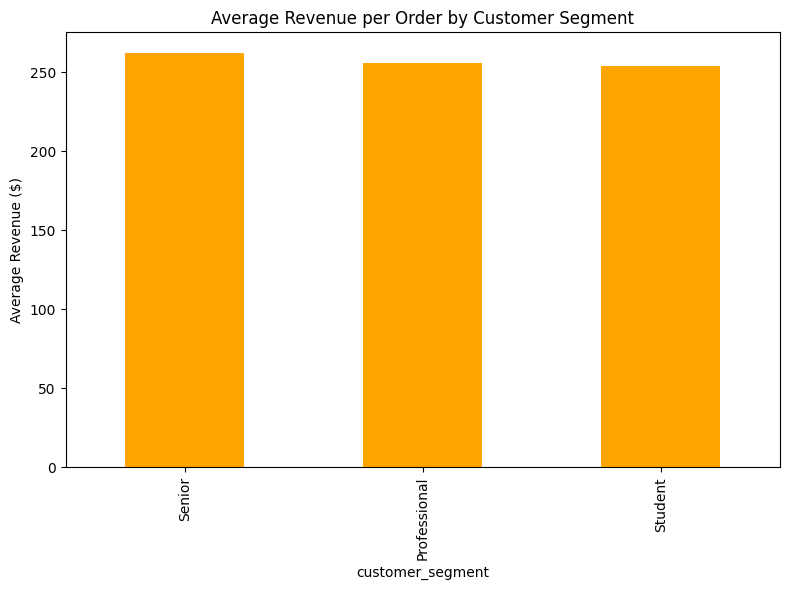

In [ ]:
segment_avg_spend = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print("Average Revenue per Order by Customer Segment:")
for segment, avg_revenue in segment_avg_spend.items():
    print(f"{segment}: ${avg_revenue:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
segment_avg_spend.plot(kind='bar')
plt.title('Average Revenue per Order by Customer Segment')
plt.ylabel('Average Revenue ($)')
plt.tight_layout()
plt.show()

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Total Revenue by Region:
South: $34,839.45
North: $34,351.69
East: $31,221.80
West: $27,727.73

Average Order Size by Region:
South: $274.33
North: $258.28
West: $252.07
East: $240.17


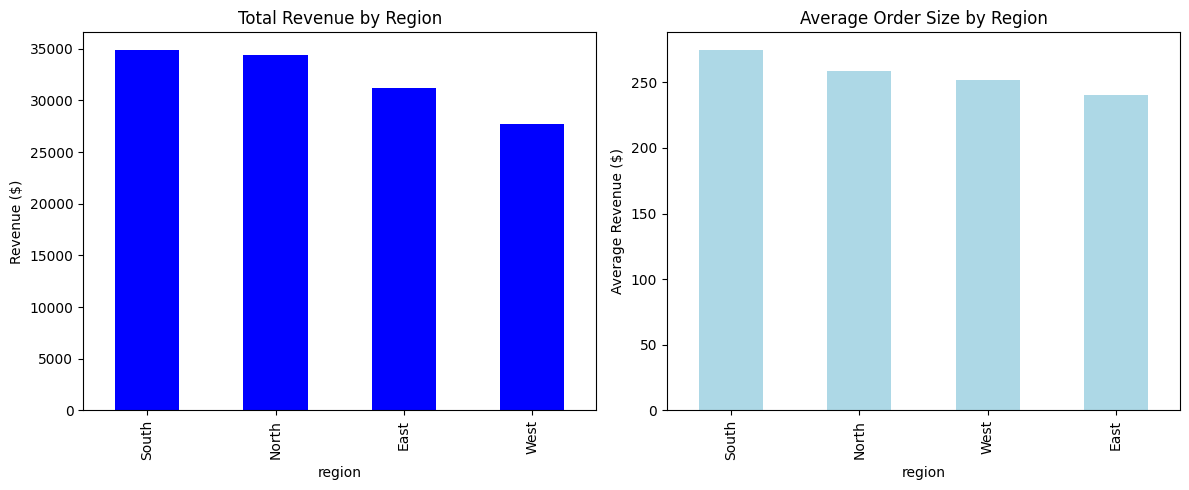

In [16]:
# Your code here
# Regional Performance Analysis
region_total_revenue = data.groupby('region')['revenue'].sum().sort_values(ascending=False)
region_avg_order = data.groupby('region')['revenue'].mean().sort_values(ascending=False)

print("Total Revenue by Region:")
for region, revenue in region_total_revenue.items():
    print(f"{region}: ${revenue:,.2f}")

print("\nAverage Order Size by Region:")
for region, avg_order in region_avg_order.items():
    print(f"{region}: ${avg_order:.2f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

region_total_revenue.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title('Total Revenue by Region')
ax1.set_ylabel('Revenue ($)')

region_avg_order.plot(kind='bar', ax=ax2, color='lightblue')
ax2.set_title('Average Order Size by Region')
ax2.set_ylabel('Average Revenue ($)')

plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product Categories by Quantity Sold:
Home: 269 units
Clothing: 253 units
Sports: 246 units
Electronics: 239 units
Books: 227 units

Product Categories by Revenue:
Home: $29,871.47
Electronics: $25,498.31
Clothing: $24,804.57
Books: $24,046.06
Sports: $23,920.26


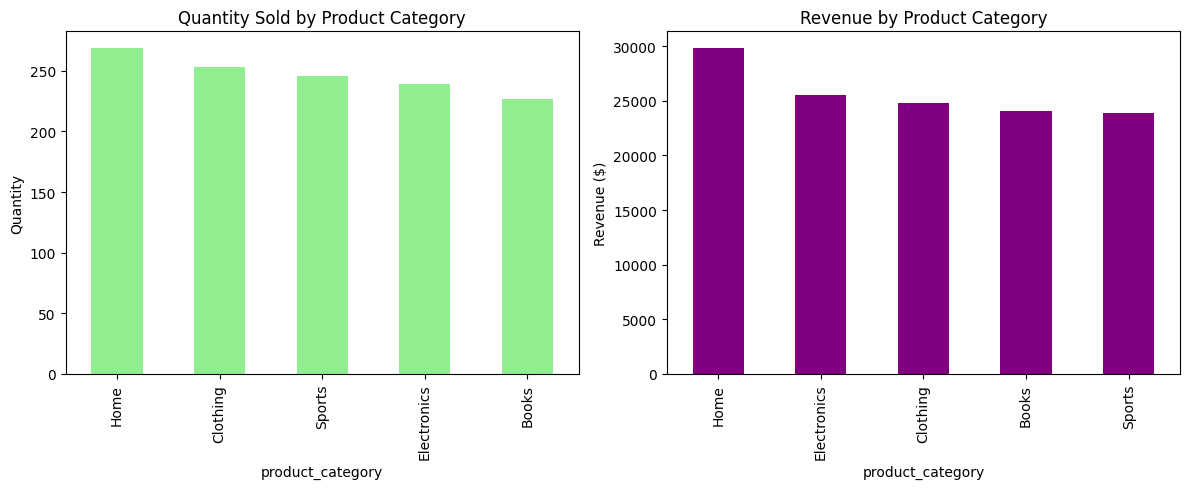

In [17]:
category_quantity = data.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
category_revenue = data.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

print("Product Categories by Quantity Sold:")
for category, qty in category_quantity.items():
    print(f"{category}: {qty} units")

print("\nProduct Categories by Revenue:")
for category, revenue in category_revenue.items():
    print(f"{category}: ${revenue:,.2f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

category_quantity.plot(kind='bar', ax=ax1, color='lightgreen')
ax1.set_title('Quantity Sold by Product Category')
ax1.set_ylabel('Quantity')

category_revenue.plot(kind='bar', ax=ax2, color='purple')
ax2.set_title('Revenue by Product Category')
ax2.set_ylabel('Revenue ($)')

plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [18]:
data['has_discount'] = data['discount_applied'] > 0

discount_analysis = data.groupby('has_discount', observed=False)['revenue'].agg(['mean', 'count'])
print("Revenue Comparison: Discounted vs Non-Discounted Orders:")
print(f"Non-Discounted Orders: ${discount_analysis.loc[False, 'mean']:.2f} average revenue")
print(f"Discounted Orders: ${discount_analysis.loc[True, 'mean']:.2f} average revenue")

# Detailed discount analysis
discount_ranges = pd.cut(
    data['discount_applied'], 
    bins=[-1, 0, 10, 20, 30], 
    labels=['No Discount', '0-10%', '10-20%', '20-30%']
)

discount_performance = data.groupby(discount_ranges, observed=False)['revenue'].mean()

print("\nAverage Revenue by Discount Range:")
for range_label, avg_revenue in discount_performance.items():
    print(f"{range_label}: ${avg_revenue:.2f}")

Revenue Comparison: Discounted vs Non-Discounted Orders:
Non-Discounted Orders: $248.30 average revenue
Discounted Orders: $263.83 average revenue

Average Revenue by Discount Range:
No Discount: $248.30
0-10%: $265.90
10-20%: $257.45
20-30%: $267.85


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Payment Method Usage:
Credit Card: 27.4%
Gift Card: 24.8%
Debit Card: 24.6%
PayPal: 23.2%

Average Revenue by Payment Method:
Debit Card: $275.98
Credit Card: $257.44
Gift Card: $254.36
PayPal: $236.07


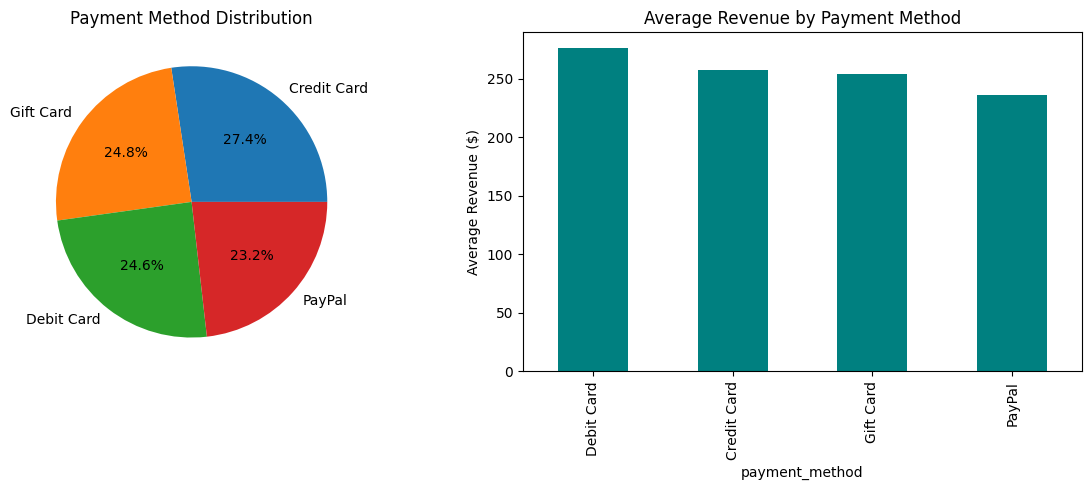

In [19]:
payment_counts = data['payment_method'].value_counts()
payment_percentages = (payment_counts / len(data) * 100).round(2)
payment_avg_revenue = data.groupby('payment_method')['revenue'].mean().sort_values(ascending=False)

print("Payment Method Usage:")
for method, pct in payment_percentages.items():
    print(f"{method}: {pct}%")

print("\nAverage Revenue by Payment Method:")
for method, avg_rev in payment_avg_revenue.items():
    print(f"{method}: ${avg_rev:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
payment_percentages.plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Payment Method Distribution')
axes[0].set_ylabel('')
payment_avg_revenue.plot(kind='bar', color='teal', ax=axes[1])
axes[1].set_title('Average Revenue by Payment Method')
axes[1].set_ylabel('Average Revenue ($)')
plt.tight_layout()
plt.show()


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Revenue by Day of Week:
Monday: $17,704.70
Tuesday: $18,968.41
Wednesday: $18,908.21
Thursday: $17,846.36
Friday: $18,522.40
Saturday: $18,660.35
Sunday: $17,530.24

Weekend Revenue: $36,190.59
Weekday Revenue: $91,950.08


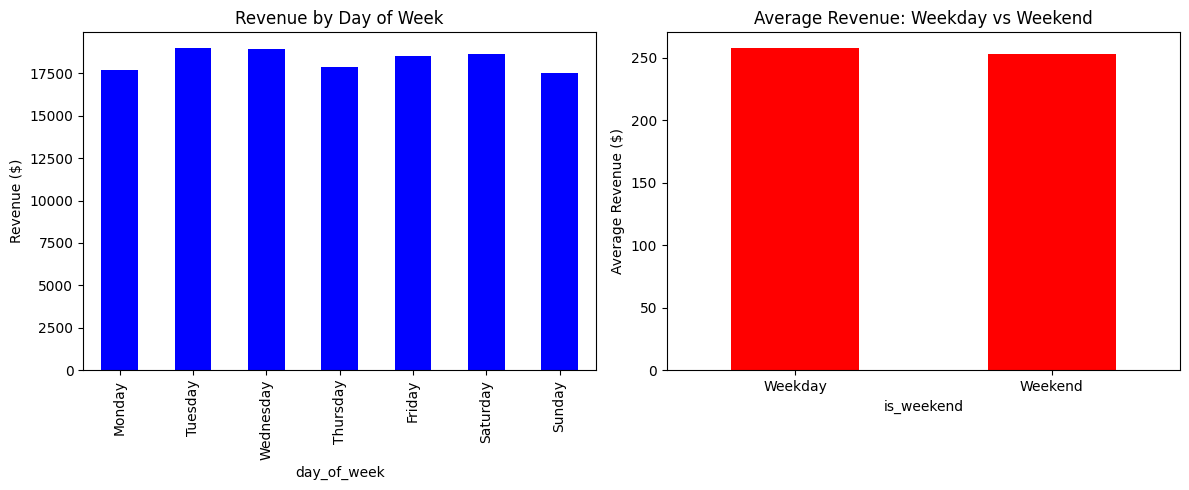

In [22]:
daily_revenue = data.groupby('day_of_week')['revenue'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = daily_revenue.reindex(day_order)

print("Revenue by Day of Week:")
for day, revenue in daily_revenue.items():
    print(f"{day}: ${revenue:,.2f}")

data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday'])
weekend_analysis = data.groupby('is_weekend')['revenue'].agg(['sum', 'mean', 'count'])

print(f"\nWeekend Revenue: ${weekend_analysis.loc[True, 'sum']:,.2f}")
print(f"Weekday Revenue: ${weekend_analysis.loc[False, 'sum']:,.2f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
daily_revenue.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title('Revenue by Day of Week')
axes[0].set_ylabel('Revenue ($)')
weekend_analysis['mean'].plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title('Average Revenue: Weekday vs Weekend')
axes[1].set_ylabel('Average Revenue ($)')
axes[1].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
plt.tight_layout()
plt.show()


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Estimated Total Profit: $25,628.13

Profit by Region:
South: $6,967.89
North: $6,870.34
East: $6,244.36
West: $5,545.55

Profit by Product Category:
Home: $5,974.29
Electronics: $5,099.66
Clothing: $4,960.91
Books: $4,809.21
Sports: $4,784.05


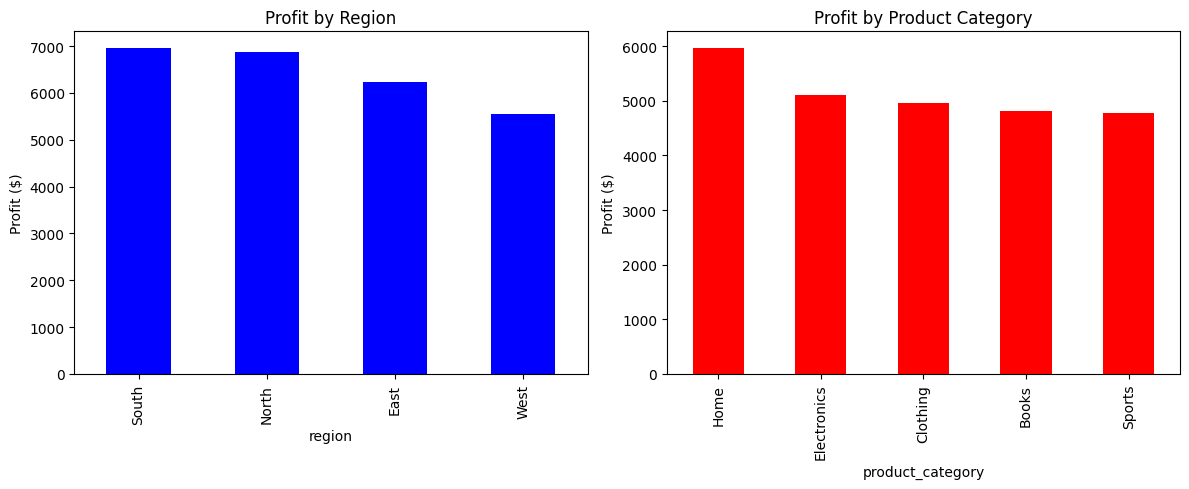

In [24]:
# Your code here

profit_margin = 0.20  # 20% profit margin
data['profit'] = data['revenue'] * profit_margin

total_profit = data['profit'].sum()
print(f"Estimated Total Profit: ${total_profit:,.2f}")

# Most profitable region
region_profit = data.groupby('region')['profit'].sum().sort_values(ascending=False)
print("\nProfit by Region:")
for region, profit in region_profit.items():
    print(f"{region}: ${profit:,.2f}")

# Most profitable product category
category_profit = data.groupby('product_category')['profit'].sum().sort_values(ascending=False)
print("\nProfit by Product Category:")
for category, profit in category_profit.items():
    print(f"{category}: ${profit:,.2f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

region_profit.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title('Profit by Region')
ax1.set_ylabel('Profit ($)')

category_profit.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Profit by Product Category')
ax2.set_ylabel('Profit ($)')

plt.tight_layout()
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

After reviewing last quarter’s data, here’s what stands out and what I suggest we focus on:

Our Professional customers spend the most per order, especially on Electronics, which is also our most profitable
category. This combination shows where our biggest opportunity lies.

Here’s what the data tells us:
- Professional customers spend more on average
- Electronics brings in the highest profit
- The West region performs the strongest
- Orders with 10–20% discounts earn more revenue than those with no discount

So for next quarter, I recommend:
1. Launch a “Professional Tech Collection” aimed at Professional customers
2. Promote top Electronics products with 10–15% discounts
3. Focus marketing efforts in the West region
4. Offer small perks for customers using credit cards, since they tend to spend more

In short, we should keep investing in what’s already working. Focusing on our strongest customers, products,
and regions will help us grow faster and get better results.

We can expand to other areas later, but starting with our strengths will give us the best return right now.

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.